In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

In [4]:
display(train.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
display(train.describe())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

In [7]:
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


**HomePlanet**

There are three home planets: Earth, Europa and Mars. Earth being the most common (4602/8492)
Does the planet you came from affect your survival?


In [8]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

**CryoSleep**

Most people did not have CryoSleep. About 5439 people out of the 8476 people do not have it. (217 missing)
How does this affect survival chance?


In [9]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

**Cabin**

There are 6560 different cabin codes. #G/734/S# is the most common, holding 8 people.
Overall, only 8494 people had their cabin codes recorded (199 missing).

In [35]:
print('There are', len(train['Cabin'].value_counts()), 'cabins on the ship.')
display(train['Cabin'].value_counts())

print('There are', len(train['Cabin'].unique()), 'different cabin codes.')

There are 6560 cabins on the ship.


G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

There are 6561 different cabin codes.


In [39]:
train['Cab('A')

AttributeError: 'Series' object has no attribute 'contains'

**Destination**

There are 3 destinations. 

TRAPPIST-1e, 55 Cancrie and PSO 3318.5 -22. About 6000 people were headed for TRAPPIST -1e.
182 people do not have destinations recorded.

In [11]:


print(train['Destination'].value_counts())

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


**Age**

Only one percent of the people are over 65 years. Most of them are between 20 and 40.
There is a significant number of babies and toddlers. I hope they are escaped. 
179 people do not know their ages.

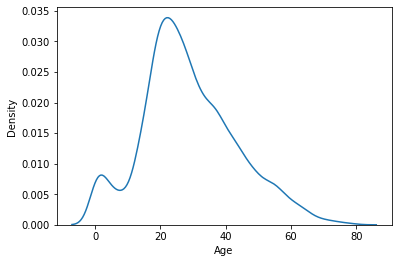

In [12]:
sns.kdeplot(x=train['Age'])
plt.show()

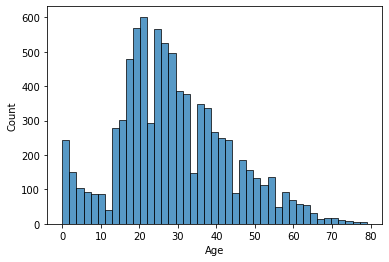

In [13]:
sns.histplot(train['Age'])
plt.show()

In [14]:
print(train['Age'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99]))

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
10%        13.000000
20%        18.000000
30%        21.000000
40%        24.000000
50%        27.000000
60%        31.000000
70%        35.000000
80%        41.000000
90%        49.000000
95%        56.000000
99%        65.000000
max        79.000000
Name: Age, dtype: float64


**VIP**

As expected, only 199 people out of the 8490 people are in the VIP lounge. Maybe VIP also has a specific Cabin Code. We shall see.

And maybe VIP personnels get VIP treatment in the face of death?

203 people do not even know if they are in VIP or not. Maybe they were hitch-hikers... lol

In [15]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

**RoomService**

5577 people out of 8512 have nothing to do with Room Service, whereas someone spent as much as 14000 on the same. Are VIP personnels more prone to using Room service? How about old people? Or people from other planets?

What is the total amount spent on Room service?

In [16]:
train['RoomService'].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

**FoodCourt**

While someone spent 30000 at the food court, most people spend less than 5000. except the 183 people who are secretive about their spendings.

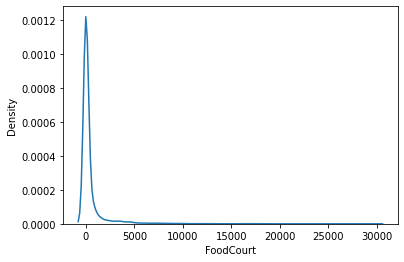

In [17]:
sns.kdeplot(x=train['FoodCourt'])
plt.show()

**ShoppingMall**

While half of the people spent 0 at the Mall and 99% of everyone spent less than 2333 at the mall, there is a 1% who do not care to spend as much as 23,500 at the mall.

It seems some crazily rich people are aboard this ship. Do they spend this much at the food court and the spa too? How old are these rich folks? How many of them are there?


count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
10%          0.000000
50%          0.000000
80%         97.000000
90%        619.600000
95%        927.800000
99%       2333.440000
max      23492.000000
Name: ShoppingMall, dtype: float64


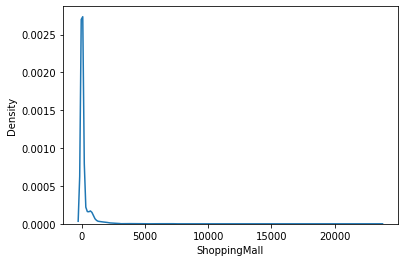

In [18]:
sns.kdeplot(x=train['ShoppingMall'])
print(train['ShoppingMall'].describe(percentiles=[.1, .8, .9, .95, .99]))
plt.show()

**Spa**

60% of the people did not visit the spa at all.

99.5% of the people spend less than 7000 at the Spa. Some of these crazily rich folks spent over 22,000(0.5% of the total number)

It seems that after food, those who spend high, spent it at the spa.

Are females nearer to the spa than males?
Are old men?
Old rich women?
How do those who spend high at the mall spend at the spa?
How does this affect their survival?

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
10%          0.000000
50%          0.000000
60%          0.000000
70%         15.000000
90%        732.000000
95%       1607.100000
99%       5390.100000
99.5%     7837.110000
max      22408.000000
Name: Spa, dtype: float64


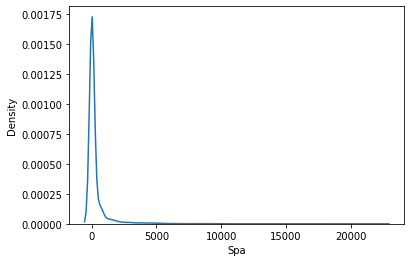

In [19]:
sns.kdeplot(train['Spa'])
print(train['Spa'].describe(percentiles=[.1, .6, .7, .9, .95, .99, .995]))
plt.show()

**VRDeck**
I do not really understand what this means.], but most people still don't see the need fort it.

But our rich friends still played to the gallery as usual.

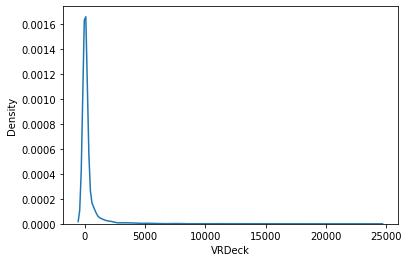

In [20]:
sns.kdeplot(train['VRDeck'])
plt.show()

**Name**

This is not so interesting, but 200 names were missing. I wish I could query the clerk.
The only interesting part is probably that there are 8474 unique names.


Yes, a few people had the same names!

We don't really care who they are, do you?

In [21]:
len(train['Name'].unique())

8474

**Transported**

I guess this is what reflects the survival.
About 50% survived. Thank God we are able to account for everyone.
At least, anyone missing at the shore did not survive.

In [22]:
train.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

Now, some **EDA's**

* *Does the planet you come from affect your survival?*
* *Does having CryoSleep affect your survival?*
* *What is common to those guys on G/734/S?*
* *Which cabin(s) is/are likely to be VIP?*
* *How did the toddlers and aged people fare?*
* *How did VIP fare in the face of death?*
* *What is the spending habit of VIP guys?*
* *Do old people use Room service seriously?*
* *Who are those guys that spend crazily?*
* *How many foolish spenders or, hopefully, stinkingly rich guys are aboard?*
* *Which gender and age patronised the Spa more?*
* *Does the spa save from death?*
* *Tell me the names that people share and how many of them share each name*

Does the planet you come from affect your survival?

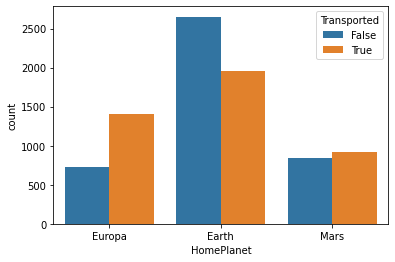

In [28]:
sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.show()

Most people from Europa survived and most non-survivors are Earthers. That may not be surprising considering that half of those aboard are Earthers. Apart from the Earthers, everyone has more chance of surviving than dying.

Does Cryosleep affect your survival?

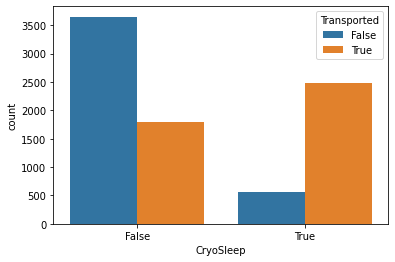

In [29]:
sns.countplot(x='CryoSleep', hue='Transported', data=train)
plt.show()

Wow! Most people who had Cryosleep did survive and about two-thirds of those who did not have Cryosleep did not survive.

Although...this does not imply causation.

What is common to those guyes on G/734/S?

In [36]:
display(train[train['Cabin'] == 'G/734/S'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4221,4498_01,Earth,False,G/734/S,55 Cancri e,11.0,False,0.0,0.0,0.0,0.0,0.0,Valex Munozanson,False
4222,4498_02,Earth,True,G/734/S,PSO J318.5-22,14.0,False,0.0,0.0,0.0,0.0,0.0,Loise Beckeetter,False
4223,4498_03,Earth,True,G/734/S,PSO J318.5-22,4.0,False,0.0,0.0,0.0,0.0,0.0,Lorie Beckeetter,True
4224,4498_04,Earth,False,G/734/S,TRAPPIST-1e,11.0,False,0.0,0.0,0.0,0.0,NaN,Dandy Munozanson,False
4225,4498_05,Earth,True,G/734/S,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Karay Beckeetter,True
4226,4498_06,Earth,False,G/734/S,TRAPPIST-1e,15.0,False,0.0,893.0,0.0,0.0,0.0,Line Munozanson,True
4227,4498_07,Earth,False,G/734/S,TRAPPIST-1e,39.0,False,0.0,2.0,0.0,69.0,836.0,Dary Mallerez,False
4228,4498_08,Earth,False,G/734/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Kendy Munozanson,False


All of them are Earthers. It is confirmed that this cabin is no VIP. None of our guys used Room Service or Shopping Mall. There seem to be 2 families and one guy on this cabin: The Monozansons and the Beckeeters and Dary Mallerez. Mr(s) Dary is the oldest (39 years). (S)he is the only one who used the Spa and VRDeck in this Cabin.

Which cabins are likely to be VIP?

In [45]:
VIP = train[train['VIP'] == True]
print('There are', len(VIP['Cabin'].value_counts()), 'VIP cabins')
VIP['Cabin'].value_counts(sort=True)

There are 190 VIP cabins


F/1550/P    2
A/103/S     2
A/75/P      2
D/189/S     1
F/1287/P    1
           ..
C/111/P     1
A/30/P      1
B/131/S     1
D/113/P     1
A/98/P      1
Name: Cabin, Length: 190, dtype: int64

There are 190 VIP cabins. Each one holds just 1 person, except for 3 cabins holding 2 each.I suspect those two people are family members. Out of over 6000 cabins, we cannot pinpoint which ones are VIPs. We will need more information on how the ship's cabin was structured to determine what is going on. I guess that the Alphabetic prefixes means something I don't know.

Oh, you think I knew? LOL

How did toddlers and aged people fare?

Wait, we need to define what age range our toddlers are.

We can say 0-10 years will be our toddler and,
65-79 will be our aged ones.

You can tweak it based on intuition, inside knowledge or just curiosity

There are 825 people in our age brackets.
There are 718 people below 10.
There are 107 people greater than 65.
Data for <10 guys: 
 True     0.707521
False    0.292479
Name: Transported, dtype: float64
Data for >65 guys: 
 False    0.560748
True     0.439252
Name: Transported, dtype: float64


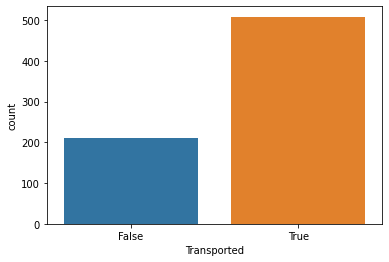

In [61]:
both_age_ranges = train[(train['Age'] <= 10) | (train['Age'] >=65)]

less_than_10 = train[train['Age'] <= 10]
greater_than_65 = train[train['Age'] >= 65]

print('There are', both_age_ranges.shape[0], 'people in our age brackets.')
print('There are', less_than_10.shape[0], 'people below 10.')
print('There are', greater_than_65.shape[0], 'people greater than 65.')


print('Data for <10 guys:', '\n', less_than_10['Transported'].value_counts(normalize=True))
print('Data for >65 guys:', '\n', greater_than_65['Transported'].value_counts(normalize=True))

sns.countplot(x=less_than_10['Transported'])
plt.show()

70% of the toddlers survived but it was worse with the adults.

How did VIP fare in the face of death?

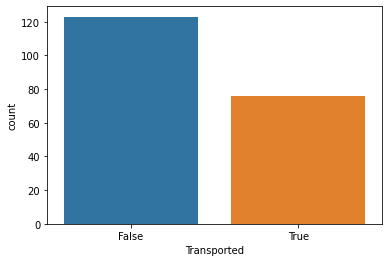

In [64]:
sns.countplot(x='Transported', data=VIP)
plt.show()

Suprisingly, death doesn't respect VIP. Something else may be responsible for that though. Deeper EDA might find it out.

What is the spending habit of VIP guys?

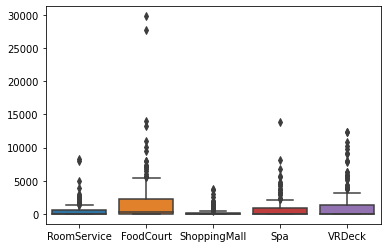

In [67]:
VIP_spendings = VIP[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
sns.boxplot(data=VIP_spendings)
plt.show()

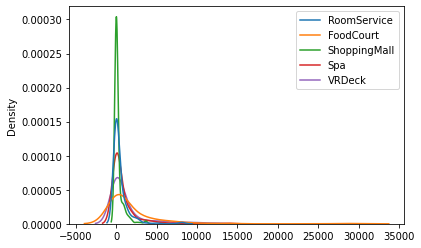

In [69]:
sns.kdeplot(data=VIP_spendings)
plt.show()

Wow! So rich men - sorry, VIP guys- do not spend money lavishly? The box plot shows that majority(safely 80%) of them spend below 5000 on anything. Those who spent most did so on Food.

As if with a united heart, they spent the least amount at the Mall. 

So those extravagant spenders are not that rich? What a trip we're on!

Let's not forget how the kdeplot is overcrowded and will not be the best visual aid in this case, except of course, it is created separately for each variable.

Do old people use Room service seriously?

327.53333333333336
The number of old people who spend more than 75% of the entire people aboard is 34


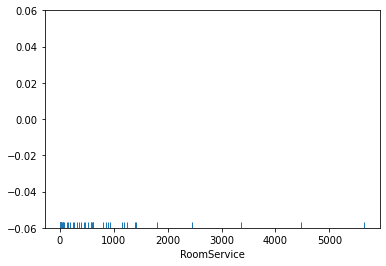

In [93]:
sns.rugplot(x='RoomService', data=greater_than_65)
print(greater_than_65['RoomService'].mean())
print('The number of old people who spend more than 75% of the entire people aboard is', (greater_than_65['RoomService'] > 47).sum())
plt.show()

Considering that the average amount everybody spends on Room Service is 224, aged people spend more on it averagely.

OH! 75% of people spend less than 47, while 34/107 old people spent above that. A whooping 63/107 spent 0 on that. That means, more than half do not like Room Service or do not need it or cannot afford it. We cannot therefore conclude that old people use Room service more than others. We can only say that those who do spend big on it. 

Maybe the older they, are the more they spend. We wouldn't know because we are not finding that out

Who are these guys that spend crazy?

Well, we need a threshold to cut out broke guys. Let's set it at top 10% spending.

For Room service, the 10% is 14327;
FoodCourt has it at 1026;
ShoppingMall stays at 619.6;
Spa at 732;
VRDeck at 732.6

In [84]:
train.describe(percentiles=[.9])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,49.000000,753.000000,1026.000000,619.600000,732.000000,732.600000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [92]:
big_spenders = train[
    (train['RoomService'] > 14327) |
    (train['FoodCourt'] > 1026) |
    (train['ShoppingMall'] > 620) |
    (train['Spa'] > 732) |
    (train['VRDeck'] > 733)
]

print('There are', big_spenders.shape[0], 'big spenderzz')
print('The average age of big spenders is', big_spenders['Age'].mean())
print('The youngest big spender is', big_spenders['Age'].min(), 'years old')
print((big_spenders['VIP'] == True).sum(), 'big spenders stay in VIP. Very low.')
print((big_spenders['CryoSleep'] == True).sum(), 'of them had Cryosleep')
print(big_spenders['HomePlanet'].value_counts())

There are 2635 big spenderzz
The average age of big spenders is 32.896525096525096
The youngest big spender is 13.0 years old
131 big spenders stay in VIP. Very low.
0 of them had Cryosleep
Europa    1076
Earth     1062
Mars       446
Name: HomePlanet, dtype: int64


Yay! EuropANS do not mind spending big. They must either be super rich in that planet orrrrrrr they are stupid spenders orrrrr they want to impress orrrr.... continue imagining. 

But you can't blame them so much with blaming Earthers too. Almost the same number of people came from Earth too. Just that the fraction points at EuropANS as gallery players.


We already answered how many stinkingly rich guys we have aboard. Too bad we can't know if they are really rich or blazing their trust funds.